In [5]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as Optim
from torch.utils.data import DataLoader,Dataset,ConcatDataset
from torch.utils.data.sampler import SubsetRandomSampler

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

In [6]:
root_dir = '/kaggle/input/intel-image-classification/seg_train/seg_train'
class_list = ['buildings','forest','glacier','mountain','sea','street']

for c in class_list:
    l = os.listdir(os.path.join(root_dir,c))
    print(c+":",len(l))

buildings: 2191
forest: 2271
glacier: 2404
mountain: 2512
sea: 2274
street: 2382


In [7]:
class IntelDataset(Dataset):
    
    def __init__(self,file_list,file_dir,mode="train",data_transform=None):
        self.file_list = file_list
        self.file_dir = file_dir
        self.mode = mode
        self.transform = data_transform
        
        if self.mode == "train" or self.mode == "val":
            if "buildings" in self.file_dir:
                self.label = 0
            elif "forest" in self.file_dir:
                self.label = 1
            elif "glacier" in self.file_dir:
                self.label = 2
            elif "mountain" in self.file_dir:
                self.label = 3
            elif "sea" in self.file_dir:
                self.label = 4
            elif "street" in self.file_dir:
                self.label = 5
    def __len__(self):
        return len(self.file_list)
    
    def __getitem__(self,idx):
        img = Image.open(os.path.join(self.file_dir,self.file_list[idx]))
        
        if self.transform:
            img = self.transform(img)
        
        if self.mode == "train" or self.mode == "val":
            img = img.numpy()
            return img.astype('float32'),self.label
        else:
            img = img.numpy()
            return img.astype('float32'),self.file_list[idx]

data_transform = transforms.Compose([transforms.Resize(256),
                                     transforms.ColorJitter(),
                                     transforms.RandomCrop(224),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.RandomRotation(degrees=(-30,30)),
                                     transforms.ToTensor()])


train_root_dir = '/kaggle/input/intel-image-classification/seg_train/seg_train'
train_dataset = None

for c in class_list:
    file_dir = os.path.join(train_root_dir,c)
    file_list = os.listdir(file_dir)
    temp_dataset = IntelDataset(file_list,file_dir,"train",data_transform)
    
    if train_dataset == None:
        train_dataset = temp_dataset
    else:
        train_dataset = ConcatDataset([train_dataset,temp_dataset])

trainloader = DataLoader(train_dataset, batch_size = 64,num_workers=3,shuffle=True)
print(len(train_dataset))

val_transform = transforms.Compose([transforms.Resize(236),
                                    transforms.RandomCrop(224),
                                     transforms.ToTensor()])

val_root_dir = '/kaggle/input/intel-image-classification/seg_test/seg_test'
val_dataset = None

for c in class_list:
    file_dir = os.path.join(val_root_dir,c)
    file_list = os.listdir(file_dir)
    temp_dataset = IntelDataset(file_list,file_dir,"val",val_transform)
    
    if val_dataset == None:
        val_dataset = temp_dataset
    else:
        val_dataset = ConcatDataset([val_dataset,temp_dataset])

valloader = DataLoader(val_dataset, batch_size = 64,num_workers=3,shuffle=True)
print(len(val_dataset))

14034
3000


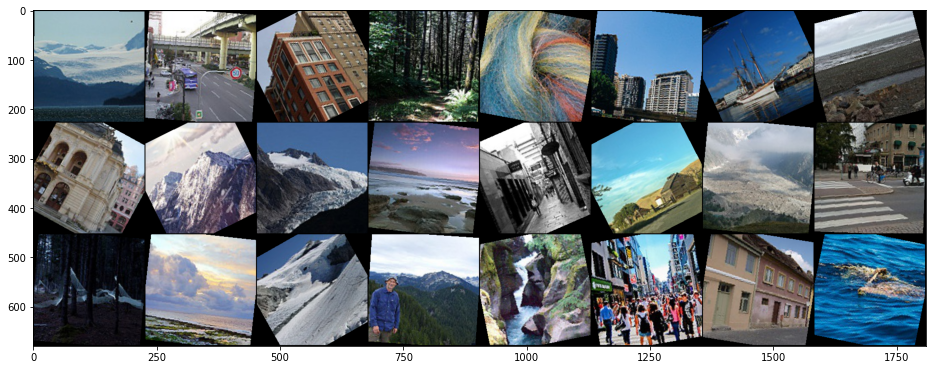

In [8]:
samples, labels = iter(trainloader).next()
plt.figure(figsize=(16,24))
grid_imgs = torchvision.utils.make_grid(samples[:24])
np_grid_imgs = grid_imgs.numpy()
# in tensor, image is (batch, width, height), so you have to transpose it to (width, height, batch) in numpy to show it.
plt.imshow(np.transpose(np_grid_imgs, (1,2,0)))

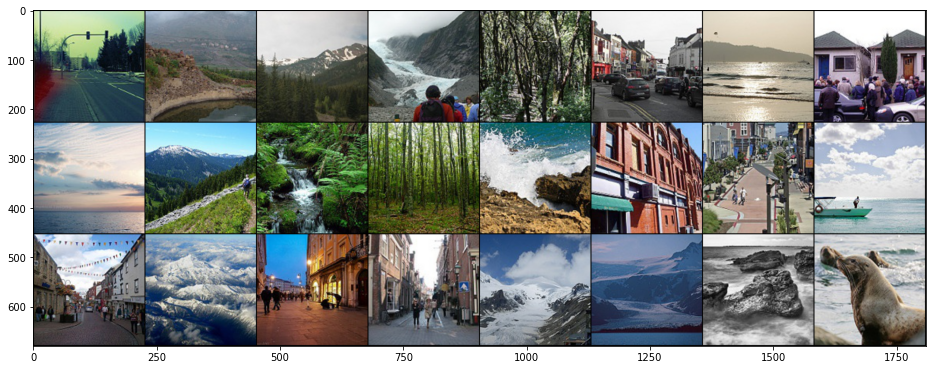

In [9]:
samples, labels = iter(valloader).next()
plt.figure(figsize=(16,24))
grid_imgs = torchvision.utils.make_grid(samples[:24])
np_grid_imgs = grid_imgs.numpy()
# in tensor, image is (batch, width, height), so you have to transpose it to (width, height, batch) in numpy to show it.
plt.imshow(np.transpose(np_grid_imgs, (1,2,0)))

In [10]:
USE_GPU = True

if USE_GPU and torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU")
else:
    device = torch.device("cpu")
    print("Using CPU")

Using GPU


In [ ]:
class Baseline(nn.Module):
    
    def __init__(self):
        super(Baseline, self).__init__()
        
        self.conv1 = nn.Conv2d(3,32,3,1,1)
        self.batch1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32,32,3,1,1)
        self.batch2 = nn.BatchNorm2d(32)
        
        self.conv3 = nn.Conv2d(32,64,3,1,1)
        self.batch3 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64,64,3,1,1)
        self.batch4 = nn.BatchNorm2d(64)
        
        self.conv5 = nn.Conv2d(64,128,3,1,1)
        self.batch5 = nn.BatchNorm2d(128)
        self.conv6 = nn.Conv2d(128,128,3,1,1)
        self.batch6 = nn.BatchNorm2d(128)
        
        self.conv7 = nn.Conv2d(128,256,3,1,1)
        self.batch7 = nn.BatchNorm2d(256)
        self.conv8 = nn.Conv2d(256,256,3,1,1)
        self.batch8 = nn.BatchNorm2d(256)
        
        self.conv9 = nn.Conv2d(256,512,3,1,1)
        self.batch9 = nn.BatchNorm2d(512)
        self.conv10 = nn.Conv2d(512,512,3,1,1)
        self.batch10 = nn.BatchNorm2d(512)
        
        self.conv11 = nn.Conv2d(512,512,3,1,1)
        self.batch11 = nn.BatchNorm2d(512)
        self.conv12 = nn.Conv2d(512,512,3,1,1)
        self.batch12 = nn.BatchNorm2d(512)
        
        self.pool = nn.MaxPool2d(2,2)
        
        self.fc1 = nn.Linear(512*3*3,1024)
        self.fc2 = nn.Linear(1024,256)
        self.fc3 = nn.Linear(256,32)
        self.fc4 = nn.Linear(32,6)
    
    def forward(self,x):
        
        x = F.relu(self.batch1(self.conv1(x)))
        x = F.relu(self.batch2(self.conv2(x)))
        x = self.pool(x)
        
        x = F.relu(self.batch3(self.conv3(x)))
        x = F.relu(self.batch4(self.conv4(x)))
        x = self.pool(x)
        
        x = F.relu(self.batch5(self.conv5(x)))
        x = F.relu(self.batch6(self.conv6(x)))
        x = self.pool(x)
        
        x = F.relu(self.batch7(self.conv7(x)))
        x = F.relu(self.batch8(self.conv8(x)))
        x = self.pool(x)
        
        x = F.relu(self.batch9(self.conv9(x)))
        x = F.relu(self.batch10(self.conv10(x)))
        x = self.pool(x)
        
        x = F.relu(self.batch11(self.conv11(x)))
        x = F.relu(self.batch12(self.conv12(x)))
        x = self.pool(x)
        
        x = x.view(x.shape[0],x.shape[1]*x.shape[2]*x.shape[3])
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return x

baseline = Baseline()
baseline = baseline.to(device)
print(baseline)

In [12]:
pip install torchsummary

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from torchsummary import summary
summary(baseline, (3, 224, 224))

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = Optim.Adam(baseline.parameters(),lr = 0.001,weight_decay=1e-5)

In [ ]:
def model_eval(dataloader):
    total = 0
    correct = 0
    for data in dataloader:
      images, l = data
      
      images = images.to(device)
      l = l.to(device)
      
      out = baseline(images)
      max_val, preds = torch.max(out,dim=1)
      
      total += l.shape[0]                   
      correct += (preds == l).sum().item()  
      accuracy = (100 * correct)/total
    
    
    return accuracy

In [ ]:
epochs = 20

for epoch in range(epochs):
    print("Epoch:",epoch)
    
    running_loss = 0.0
    train_loss = 0.0
    I = 0
    for i,data in enumerate(trainloader,0):
        images,labels = data
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = baseline(images)
        loss = criterion(outputs,labels)
        
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        train_loss += loss.item()
        I += i
        
        if i%50 == 49:
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 50))
            running_loss = 0.0

    train_loss = train_loss / I
    train_acc = model_eval(trainloader)
    val_acc = model_eval(valloader)
    
    print("Train Loss:",train_loss)
    print("Training Accuracy:",train_acc,"Val Accuracy:",val_acc)
    print("")
    train_loss = 0
    I = 0

In [11]:
from torchvision import models
from collections import OrderedDict

places_res50 = torch.load('/kaggle/input/arsh-intel-image-places365-resnet50-weights/resnet50_places365.pth.tar',  map_location=lambda storage, loc: storage)


resnet50_backbone = models.resnet50()
state_dict = places_res50['state_dict'] 
new_state_dict = OrderedDict()


for key in state_dict.keys():
  new_state_dict[key[7:]]= state_dict[key]


resnet50_backbone.fc = torch.nn.Linear(2048,365) # Matching with default res50 dense layer
resnet50_backbone.load_state_dict(new_state_dict)
resnet50_backbone = resnet50_backbone.to(device)

ct = 1
for child in resnet50_backbone.children():
    if ct <= 7:
        for param in child.parameters():
            param.requires_grad = False
    ct += 1
        
print(resnet50_backbone)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [13]:
from torchvision import models

resnet50_backbone = models.resnet50(pretrained=True)
resnet50_backbone = resnet50_backbone.to(device)

ct = 1
for child in resnet50_backbone.children():
    if ct <= 7:
        for param in child.parameters():
            param.requires_grad = False
    ct += 1
        
print(resnet50_backbone)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [13]:
from torchsummary import summary
summary(resnet50_backbone, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [ ]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        
        self.features = nn.Sequential(*(list(resnet50_backbone.children())[:-2])) 
        
        self.conv1 = nn.Conv2d(2048,2048,3,1,1)
        
        self.pool = nn.MaxPool2d(2,2)
        self.batch = nn.BatchNorm2d(2048)
        
        self.drop1 = nn.Dropout(0.3)
        self.drop2 = nn.Dropout(0.2)
        self.drop3 = nn.Dropout(0.1)
        
        self.fc1 = nn.Linear(3*3*2048,5120)
        self.fc2 = nn.Linear(5120,1024)
        self.fc3 = nn.Linear(1024,512)
        self.fc4 = nn.Linear(512,128)
        self.fc5 = nn.Linear(128,64)
        self.fc6 = nn.Linear(64,32)
        self.fc7 = nn.Linear(32,6)
    
    def forward(self,x):
        
        x = self.features(x)
        
        x = F.relu(self.batch(self.conv1(x)))
        x = self.pool(x)
        
        x = x.view(x.shape[0],x.shape[1]*x.shape[2]*x.shape[3])
        
        x = F.relu(self.fc1(x))
        #x = self.drop1(x)
        
        x = F.relu(self.fc2(x))
        #x = self.drop1(x)
        
        x = F.relu(self.fc3(x))
        #x = self.drop2(x)
        
        x = F.relu(self.fc4(x))
        #x = self.drop2(x)
        
        x = F.relu(self.fc5(x))
        #x = self.drop3(x)
        
        x = F.relu(self.fc6(x))
        
        x = self.fc7(x)
        
        return x

net = Net()
net = net.to(device)

In [14]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        
        self.features = resnet50_backbone
        
        self.conv1 = nn.Conv2d(2048,2048,3,1,1)
        
        self.pool = nn.MaxPool2d(2,2)
        self.batch = nn.BatchNorm2d(2048)
        
        self.drop1 = nn.Dropout(0.3)
        self.drop2 = nn.Dropout(0.2)
        self.drop3 = nn.Dropout(0.1)
        
        
        self.fc1 = nn.Linear(365,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64)
        self.fc4 = nn.Linear(64,6)
    
    def forward(self,x):
        
        x = resnet50_backbone(x)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return x

net = Net()
net = net.to(device)

In [15]:
from torchsummary import summary
summary(net, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = Optim.Adam(net.parameters(),lr = 0.003,weight_decay=1e-5)
scheduler = Optim.lr_scheduler.ReduceLROnPlateau(optimizer,mode='min',factor=0.33,patience=3,threshold=0.0001,min_lr = 0.00001)

In [25]:
def model_eval(dataloader):
    total = 0
    correct = 0
    running_loss = 0.0
    net.eval()
    
    for data in dataloader:
      images, l = data
      
      images = images.to(device)
      l = l.to(device)
      
      out = net(images)
      v_loss = criterion(out,l)
      max_val, preds = torch.max(out,dim=1)
      
      running_loss += v_loss.item()
      
      total += l.shape[0]                   
      correct += (preds == l).sum().item()  
    
    accuracy = (100 * correct)/total
    val_loss = running_loss/total
    
    
    return val_loss,accuracy

In [26]:
epochs = 50

for epoch in range(epochs):
    net.train()
    print('Epoch-{0},lr: {1}'.format(epoch + 1, optimizer.param_groups[0]['lr']))
    
    running_loss = 0.0
    train_loss = 0.0
    I = 0
    for i,data in enumerate(trainloader,0):
        images,labels = data
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = net(images)
        loss = criterion(outputs,labels)
        
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        train_loss += loss.item()
        I += labels.shape[0] 
        
        if i%50 == 49:
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 50))
            running_loss = 0.0
        
    train_loss,train_acc = model_eval(trainloader)
    val_loss,val_acc = model_eval(valloader)
    
    print("Train Loss:",train_loss,"Val Loss:",val_loss)
    print("Training Accuracy:",train_acc,"Val Accuracy:",val_acc)
    print("")
    
    scheduler.step(val_loss)
    train_loss = 0
    I = 0

Epoch-1,lr: 0.0001


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f2f1aba8d40>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1203, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1177, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f2f1aba8d40>
Traceback (most recent call last):
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f2f1aba8d40>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1203, in __del__
  File "/opt/conda/lib/pyt

[1,    50] loss: 0.056
[1,   100] loss: 0.064
[1,   150] loss: 0.061
[1,   200] loss: 0.071
Train Loss: 0.0008212066698409017 Val Loss: 0.004324792933650315
Training Accuracy: 98.12597976343167 Val Accuracy: 93.33333333333333

Epoch-2,lr: 0.0001
[2,    50] loss: 0.066
[2,   100] loss: 0.060
[2,   150] loss: 0.061
[2,   200] loss: 0.069
Train Loss: 0.0008366901532325984 Val Loss: 0.004010607977708181
Training Accuracy: 98.06184979335899 Val Accuracy: 93.9

Epoch-3,lr: 0.0001
[3,    50] loss: 0.059
[3,   100] loss: 0.066
[3,   150] loss: 0.056
[3,   200] loss: 0.076
Train Loss: 0.0007965889102644614 Val Loss: 0.00419732503592968
Training Accuracy: 98.12597976343167 Val Accuracy: 93.56666666666666

Epoch-4,lr: 0.0001
[4,    50] loss: 0.059
[4,   100] loss: 0.058
[4,   150] loss: 0.061
[4,   200] loss: 0.061
Train Loss: 0.0007996284541603217 Val Loss: 0.004069391964469105
Training Accuracy: 98.25423970357703 Val Accuracy: 93.46666666666667

Epoch-5,lr: 0.0001
[5,    50] loss: 0.044
[5,   1

KeyboardInterrupt: 